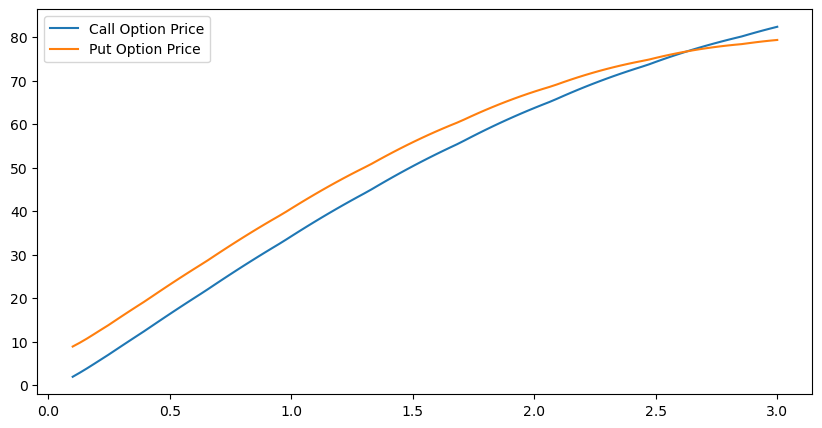

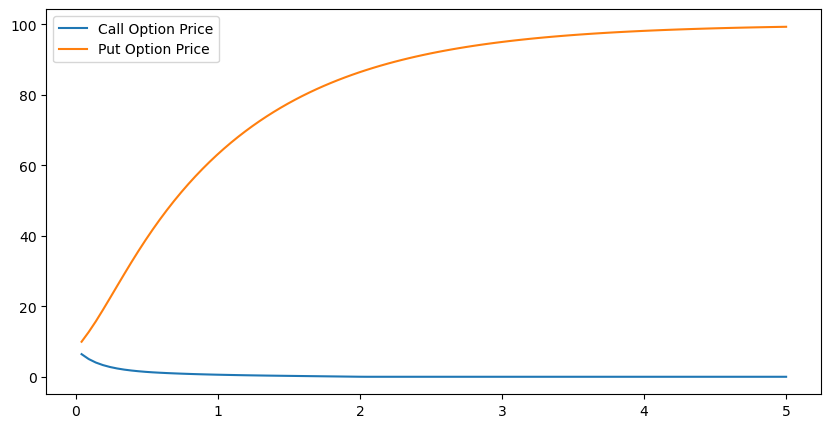

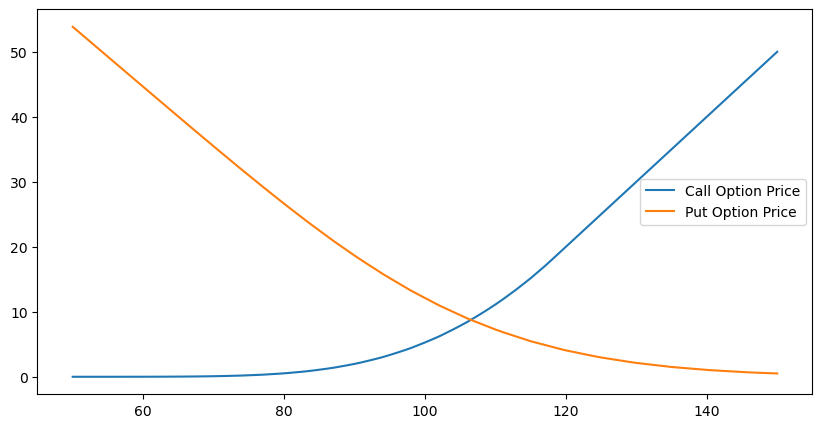

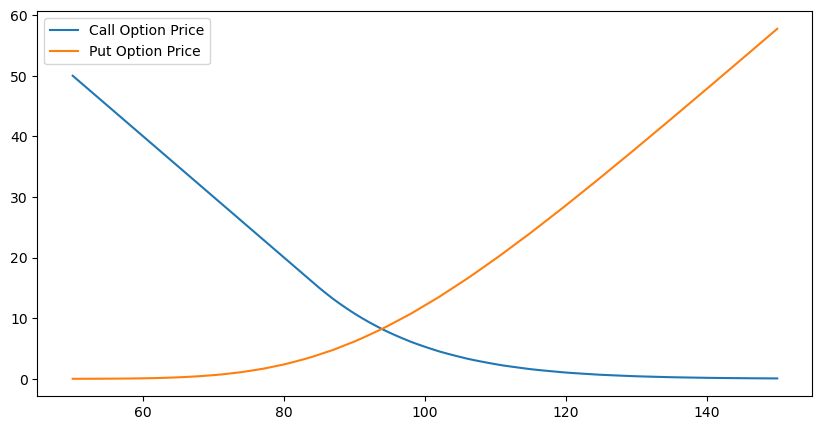

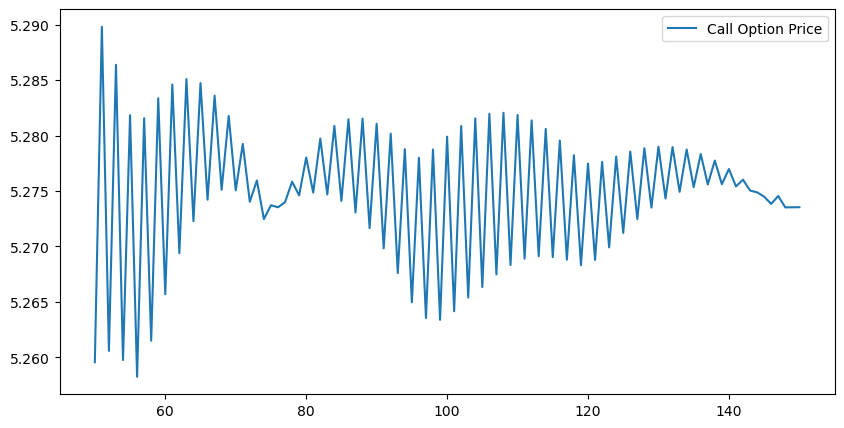

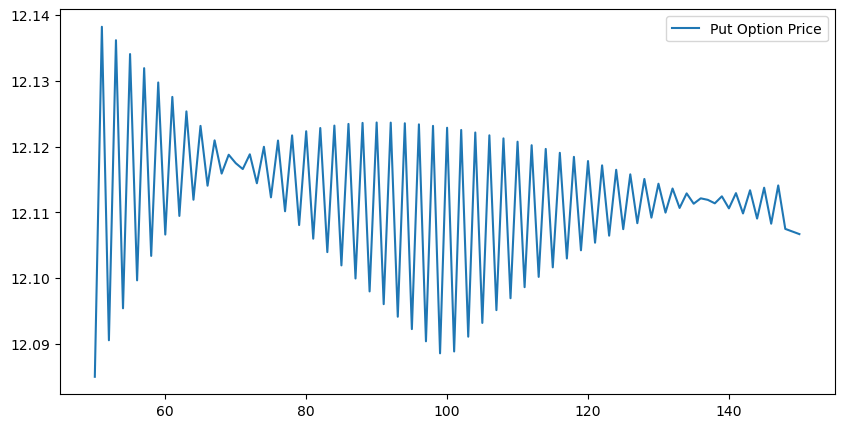

In [36]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

T=1
Sigma=np.linspace(0.1,3,100)
R=np.linspace(0.04,5,100)
K=np.linspace(50,150,100,dtype=int)
S_0=np.linspace(50,150,100,dtype=int)
M=np.linspace(50,150,100,dtype=int)

def american_pricing_option(M,T,s_0,K,r,sigma):
    delta_t=T/M
    u=math.exp(sigma*math.sqrt(delta_t) +(r-0.5*sigma*sigma)*delta_t)
    d=math.exp(-1*sigma*math.sqrt(delta_t) +(r-0.5*sigma*sigma)*delta_t)
    p=(math.exp(r*delta_t)-d)/(u-d)
    arr=np.zeros((M+1,M+1))
    put=np.zeros((M+1,M+1))
    call=np.zeros((M+1,M+1))
    arr[0][0]=s_0
    for i in range(1,M+1):
        for j in range(0,i+1):
            arr[i][j]=s_0*(u**j)*(d**(i-j))
    for i in range(0,M+1):
        put[M][i]=max(K-arr[M][i],0)
        call[M][i]=max(arr[M][i]-K,0)
    for i in range(M-1,-1,-1):
        for j in range(0,i+1):
            put[i][j]=max(K-arr[i][j],(p*put[i+1][j] +(1-p)*put[i+1][j+1])*math.exp(-r*delta_t))
            call[i][j]=max(arr[i][j]-K,(p*call[i+1][j] +(1-p)*call[i+1][j+1])*math.exp(-r*delta_t))
    return put[0][0],call[0][0]
american_pricing_option(100,1,100,100,0.08,0.2)

arr_call=[]
arr_put=[]
for sigma in Sigma:
    x,y=american_pricing_option(100,1,100,100,0.08,sigma)
    arr_call.append(x)
    arr_put.append(y)

plt.figure(figsize=(10,5))

plt.plot(Sigma, arr_call, label="Call Option Price")
plt.plot(Sigma, arr_put, label="Put Option Price")
plt.legend()
plt.show()

arr_call=[]
arr_put=[]
for r in R:
    x,y=american_pricing_option(100,1,100,100,r,0.2)
    arr_call.append(x)
    arr_put.append(y)

plt.figure(figsize=(10,5))

plt.plot(R, arr_call, label="Call Option Price")
plt.plot(R, arr_put, label="Put Option Price")
plt.legend()
plt.show()

arr_call=[]
arr_put=[]
for k in K:
    x,y=american_pricing_option(100,1,100,k,0.08,0.2)
    arr_call.append(x)
    arr_put.append(y)

plt.figure(figsize=(10,5))

plt.plot(K, arr_call, label="Call Option Price")
plt.plot(K, arr_put, label="Put Option Price")
plt.legend()
plt.show()

arr_call=[]
arr_put=[]
for s_0 in S_0:
    x,y=american_pricing_option(100,1,s_0,100,0.08,0.2)
    arr_call.append(x)
    arr_put.append(y)

plt.figure(figsize=(10,5))

plt.plot(S_0, arr_call, label="Call Option Price")
plt.plot(S_0, arr_put, label="Put Option Price")
plt.legend()
plt.show()

arr_call=[]
arr_put=[]

for m in M:
    x,y=american_pricing_option(m,1,100,100,0.08,0.2)
    arr_call.append(x)
    arr_put.append(y)

plt.figure(figsize=(10,5))

plt.plot(M, arr_call, label="Call Option Price")

plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(M, arr_put, label="Put Option Price")


plt.legend()
plt.show()

In [39]:
def american_pricing_put(M,T,s_0,K,r,sigma):
    delta_t=T/M
    u=math.exp(sigma*math.sqrt(delta_t) +(r-0.5*sigma*sigma)*delta_t)
    d=math.exp(-1*sigma*math.sqrt(delta_t) +(r-0.5*sigma*sigma)*delta_t)
    p=(math.exp(r*delta_t)-d)/(u-d)
    arr=np.zeros((M+1,M+1))
    put=np.zeros((M+1,M+1))
    call=np.zeros((M+1,M+1))
    arr[0][0]=s_0
    for i in range(1,M+1):
        for j in range(0,i+1):
            arr[i][j]=s_0*(u**j)*(d**(i-j))
    for i in range(0,M+1):
        put[M][i]=max(K-arr[M][i],0)
        call[M][i]=max(arr[M][i]-K,0)
    for i in range(M-1,-1,-1):
        for j in range(0,i+1):
            put[i][j]=max(K-arr[i][j],(p*put[i+1][j] +(1-p)*put[i+1][j+1])*math.exp(-r*delta_t))
            call[i][j]=max(arr[i][j]-K,(p*call[i+1][j] +(1-p)*call[i+1][j+1])*math.exp(-r*delta_t))
    return put

put = american_pricing_put(5,1,100,100,0.08,0.2)
 
mx = -1
t = -1
 
for i in range(0,6):
    print("intermediate value at step=",i)
    for j in range(0,i+1):
        if(mx<put[i][j]):
            mx=put[i][j]
            t=i
        print(put[i][j])
print(f"Maximum value of American put option is {mx} at t = {0.2*t} ")
print(f"Hence optimal strategy is to excercise the option at t={0.2*t}")


intermediate value at step= 0
5.331739367593511
intermediate value at step= 1
8.862804082988617
1.9722514534422129
intermediate value at step= 2
14.348670443190741
3.662190921683875
0.3457337707570196
intermediate value at step= 3
20.73140450617568
6.739576236718374
0.7025780879224495
0.0
intermediate value at step= 4
26.638497451508528
12.268172420501458
1.4277343186577993
0.0
0.0
intermediate value at step= 5
32.10539403853048
18.805945122887607
2.9013504971396884
0.0
0.0
0.0
Maximum value of American put option is 32.10539403853048 at t = 1.0 
Hence optimal strategy is to excercise the option at t=1.0
